# Projeto Aprendizado de Máquina 2019.2

O objetivo deste projeto é aplicar técnicas de Machine Learning em uma base de dados. 

Utilizando a base de dados "wine-quality" decidimos testar duas abordagens, a primeira foi fazer uma preparação nos dados de forma a definirmos um valor binário para a qualidade dos vinhos, para que pudéssemos aplicar um modelo de classificação, no caso Regressão Logística.
A segunda abordagem foi manter a base original, utilizando Regressão Linear, de forma a predizer o valor atribuído na variável "Qualidade" dos vinhos, que varia de 3 a 8.

O código e os resultados são apresentados abaixo

In [1]:
#importação das bibliotecas necessárias

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#desativando os warnings devido aos DeprecationWarning
warnings.filterwarnings("ignore")


Importando o arquivo e imprimindo estrutura das colunas

In [2]:
file_path = '..input\winequality-red.csv'
data = pd.read_csv(file_path) 
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Regressão Logística

Modelo em Regressão Logística para classicar qualidade dos vinhos entre boa ou ruim

In [3]:
# Criação de uma coluna binária para classificação com regressão logística
# Critério utilizado: se a qualidade for maior do que 5 é considerada boa (1), caso contrário ruim (0)

data['quality_binary'] = (data['quality'] > 5)*1


Selecionando as variáveis de entrada, as chamadas "features" e a variável alvo (target), que queremos classificar 


In [4]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target = ['quality_binary']

X = data[features]
y = data[target]

Dividindo base em treino e teste "manualmente" e treinando o modelo com regressão logística

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predição no conjunto de teste com regressão logística

In [6]:
prediction = logistic_regressor.predict(X_test)
print('5 itens preditos: ', prediction[:5])
print('5 itens reais:\n', y_test[:5])
print('\n')
acuracia = accuracy_score(y_true=y_test, y_pred=prediction)

r2 = r2_score(y_true=y_test, y_pred=prediction)

print('Acuracia da Regressão Logística: ', acuracia)
print('Erro R² da Regressão Logística: ', r2)


5 itens preditos:  [0 0 1 1 1]
5 itens reais:
       quality_binary
75                 0
1283               1
408                1
1281               1
1118               1


Acuracia da Regressão Logística:  0.75
Erro R² da Regressão Logística:  -0.0036866359447


Curva ROC para avaliação do modelo

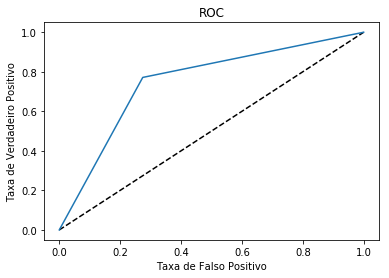

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('ROC')
plt.show()

Utilizando validação cruzada, com k=7, como outra abordagem para divisão entre treino e teste e aplicando regressão logística em cada conjunto

O score utilizado foi R², mesmo utilizado anteriormente


In [8]:
k = 7
cv_result = cross_val_score(logistic_regressor, X, y, cv=k, scoring = "r2") 
print('Score para cada conjunto: ',cv_result)
print('Score médio: ',np.sum(cv_result)/k)

Score para cada conjunto:  [-0.46797356  0.19304428 -0.41045469  0.36529539 -0.16362512  0.11846582
 -0.0754717 ]
Score médio:  -0.0629599383261


# Regressão Linear

Neste bloco, utilizamos regressão linear para predizer a qualidade do vinho de 3 a 8, valores contínuos

In [9]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target = ['quality']

X = data[features]
y = data[target]

Treinando o modelo com regressão linear

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
prediction = linear_regressor.predict(X_test)
print('5 itens preditos:\n ', prediction[:5],'\n')
print('5 itens reais:\n', y_test[:5])


5 itens preditos:
  [[ 5.09084545]
 [ 5.60581527]
 [ 5.88972495]
 [ 6.13508667]
 [ 4.99945307]] 

5 itens reais:
       quality
147         5
937         4
877         6
1000        7
73          4


O erro utilizado para Regressão Linear foi o  MSE (Mean Squared Error)

In [12]:
error = sqrt(mean_squared_error(y_true=y_test, y_pred=prediction))
print(error)

0.6357482138958115


# Conclusão

Ao final desse projeto pudemos aplicar praticamente algumas das técnicas vistas em aula. O ponto interessante foi que conseguimos aplicar duas técnicas que visam duas abordagens diferentes: regressão e classificação, sendo que isso foi possível através de uma pequena transformação nos dados para considerar a variável alvo como binária, para ser utilizada no modelo de classificação.
Além disso, aplicamos as métricas de desempenho, de forma que conseguimos verificar que os modelos funcionaram razoavelmente bem, obtendo resultados dentro do esperado.